In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('./data/alumni.csv')

In [4]:
df.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [5]:
df.shape

(88, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Graduated  88 non-null     int64 
 1   Gender          88 non-null     object
 2   Marital Status  88 non-null     object
 3   Diploma Type    88 non-null     object
 4   Defaulted       88 non-null     object
 5   Salary          88 non-null     int64 
 6   Fee             88 non-null     int64 
 7   Savings ($)     88 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


In [7]:
df.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


In [8]:
df.describe(include='O')

,Gender,Marital Status,Diploma Type,Defaulted,Savings ($)
count,88,88,88,88,88
unique,3,3,2,2,31
top,Male,Married,Standard Diploma,Yes,"$52,000"
freq,46,35,65,52,9


In [9]:
df.isna().sum()

Year Graduated    0
Gender            0
Marital Status    0
Diploma Type      0
Defaulted         0
Salary            0
Fee               0
Savings ($)       0
dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      46
Female    39
M          3
Name: count, dtype: int64

## Data Cleaning

In the above overview of the data, we see a few issues. 

- Gender has 3 options (Male, Female, and M)
- Savings is an object, when it should be a float. 

### Fixing Gender

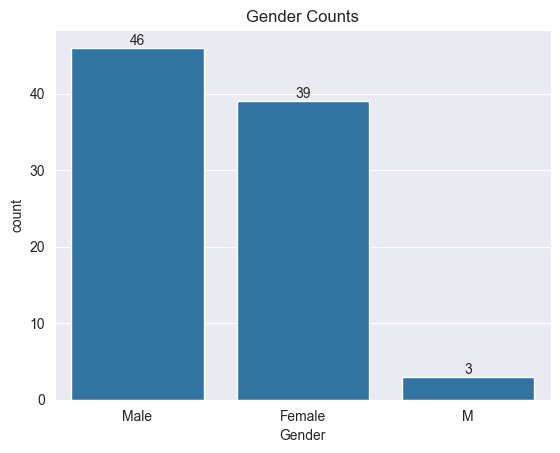

In [11]:
ax = sns.countplot(data=df, x='Gender')
ax.bar_label(ax.containers[0])
plt.title("Gender Counts")
plt.savefig("./images/gender_before.png")

We can see there are 3 rows with the value M instead of Male. Let's fix those rows. 

In [12]:
df['Gender'] = df['Gender'].replace('M', 'Male')

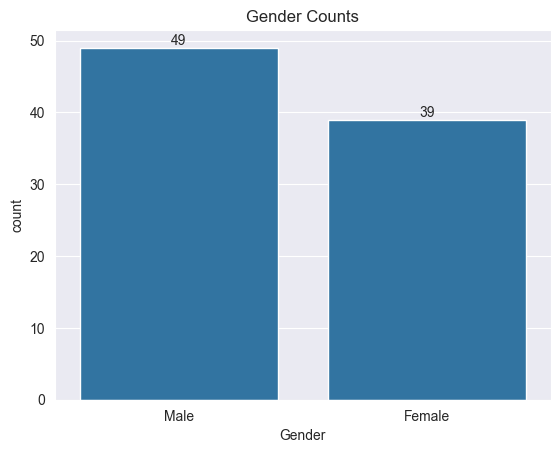

In [13]:
ax = sns.countplot(data=df, x='Gender')
ax.bar_label(ax.containers[0])
plt.title("Gender Counts")
plt.savefig("./images/gender_after.png")

There we go. 

### Fixing Savings

In [14]:
def clean_currency(curr):
    return float(curr.replace(',', '').replace('$', ''))

In [15]:
df['Savings'] = df['Savings ($)'].apply(clean_currency)

In [16]:
df.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000.0
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000.0
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000",76000.0
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000",52000.0


In [17]:
df.drop(columns=['Savings ($)'], inplace=True)

### Column Name Adjustment

In [18]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year_graduated  88 non-null     int64  
 1   gender          88 non-null     object 
 2   marital_status  88 non-null     object 
 3   diploma_type    88 non-null     object 
 4   defaulted       88 non-null     object 
 5   salary          88 non-null     int64  
 6   fee             88 non-null     int64  
 7   savings         88 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 5.6+ KB


In [20]:
# df.to_csv('./data/cleaned_alumni.csv')

## Exploratory Data Analysis

### Questions

- How do savings differ among the diploma types?
- How does salary differ between genders and diplomas?
- Does marital status and year graduated have an affect on savings?
- How does salary differ between marital status, as well as gender?
- Does diploma type have an affect on defaulted?

### How do savings differ among the diploma types?

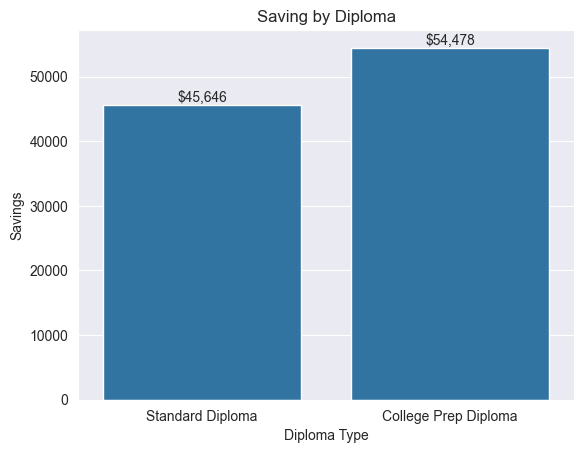

In [21]:
ax = sns.barplot(data=df, x='diploma_type', y='savings', errorbar=None)
ax.bar_label(ax.containers[0], fmt='${:,.0f}')
plt.title("Saving by Diploma")
plt.xlabel("Diploma Type")
plt.ylabel("Savings");
plt.savefig("./images/save_diploma.png")

> Based on the above barplot, it seems that alumni with College Prep Diploma's have better savings than alumni with Standard Diplomas. 

### How does salary differ between genders and diplomas?

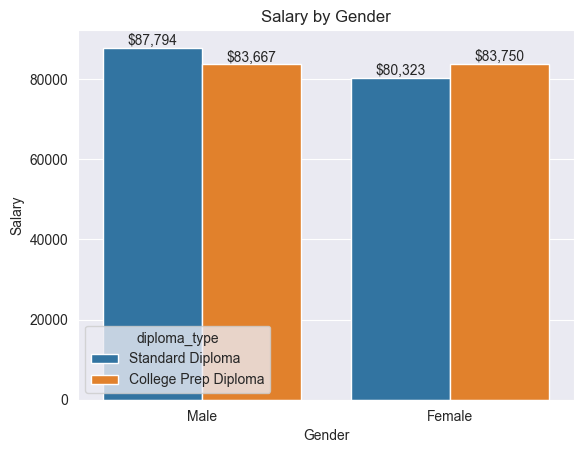

In [22]:
ax = sns.barplot(data=df, x='gender', y='salary', hue='diploma_type', errorbar=None)
for con in ax.containers:
    ax.bar_label(con, fmt='${:,.0f}')
plt.title("Salary by Gender")
plt.xlabel("Gender")
plt.ylabel("Salary");
plt.savefig("./images/salary_diploma_gender.png")

> In the above barplots, we see that, on average, Male alumni make more money than Female alumni, if they have a Standard Diploma. However, among alumni with College Prep Diplomas, Female alumni make slightly more than their Male counterparts.

### Does marital status and year graduated have an affect on savings?

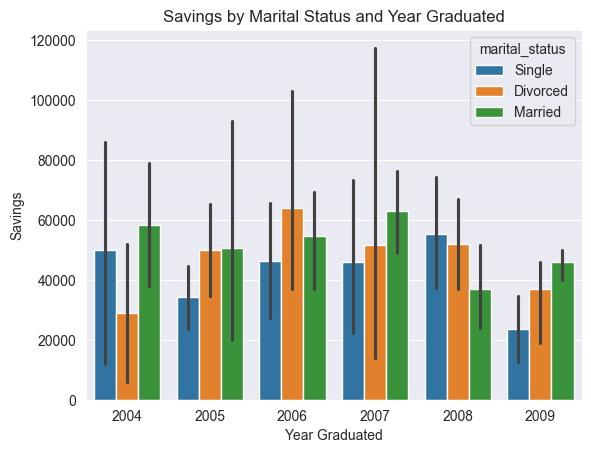

In [23]:
sns.barplot(data=df, x='year_graduated', y='savings', hue='marital_status')
plt.title("Savings by Marital Status and Year Graduated")
plt.xlabel("Year Graduated")
plt.ylabel("Savings")
plt.savefig("./images/year_savings_marital.png")

> The above barplot shows the average savings for each graduation year, split by marital status. We can see that the confidence intervals are quite large. This is due to the fact that there is not much data available when split this much, as seen below (each bar would have less than 10 datapoints)

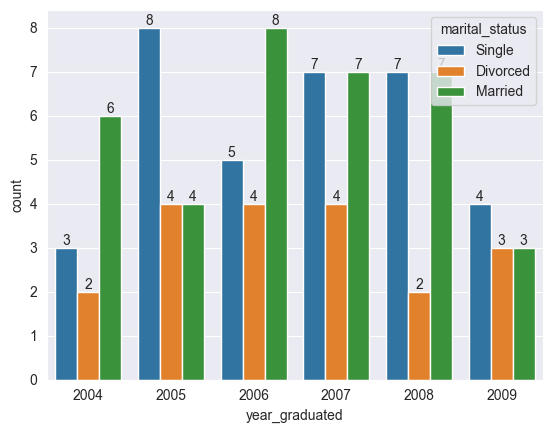

In [24]:
ax = sns.countplot(data=df, x='year_graduated', hue='marital_status')
for con in ax.containers:
    ax.bar_label(con)
plt.savefig("./images/year_marital_counts.png")

### How does salary differ between marital status, as well as gender?

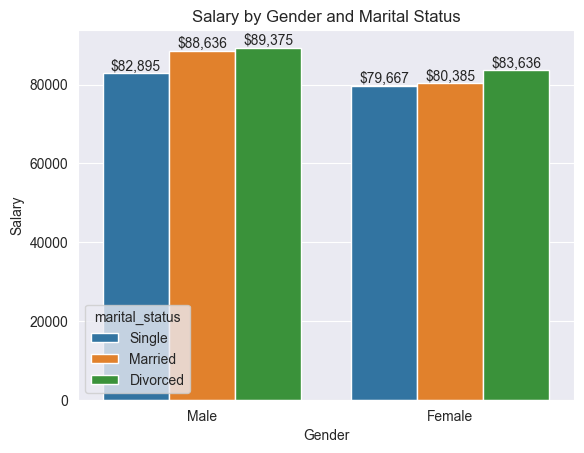

In [25]:
ax = sns.barplot(data=df, x='gender', y='salary', hue='marital_status', errorbar=None)
for con in ax.containers:
    ax.bar_label(con, fmt='${:,.0f}')
plt.title("Salary by Gender and Marital Status")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.savefig("./images/salary_gender_marital.png")

> In the above barplot, we can see that on average, single alumni make the least amount of money, while divorced alumni make the most. We also see, as we did in the earlier barplot of gender and salary, Male alumni make more money than their Female counterparts in every category. 

### Does diploma type have an affect on defaulted?

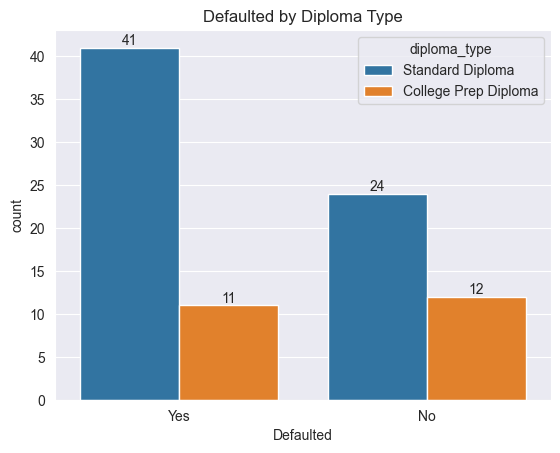

In [26]:
ax = sns.countplot(data=df, x='defaulted', hue='diploma_type')
for con in ax.containers:
    ax.bar_label(con)

plt.title("Defaulted by Diploma Type")
plt.xlabel("Defaulted")
plt.savefig("./images/default_diploma.png")

> In the above countplot, we can see that alumni with Standard Diplomas tend to default more often than alumni with College Prep Diplomas. We also see that in general, alumni tend to default. 

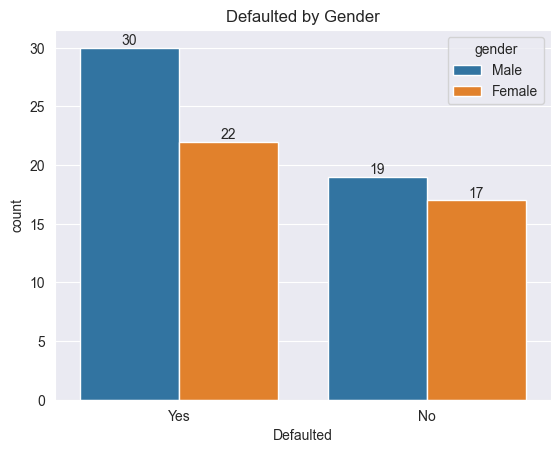

In [69]:
ax = sns.countplot(data=df, x='defaulted', hue='gender')
for con in ax.containers:
    ax.bar_label(con)
plt.title("Defaulted by Gender")
plt.xlabel("Defaulted")
plt.savefig("./images/default_gender.png")

## Modeling

For the machine learning portion of this analysis, we will try to predcit whether an alumni will default or not. 

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
df.dtypes

year_graduated      int64
gender             object
marital_status     object
diploma_type       object
defaulted          object
salary              int64
fee                 int64
savings           float64
dtype: object

In [29]:
cat_cols = ['marital_status', 'diploma_type',  'gender']
num_cols = ['year_graduated', 'salary', 'fee', 'savings']

In [30]:
X = df[cat_cols + num_cols]
y = df['defaulted']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
], remainder='passthrough')

#### Logistic Regression

In [33]:
lr_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression())
])

In [34]:
lr_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [35]:
lr_pipe.score(X_test, y_test)

0.5909090909090909

In [36]:
lr_pipe.score(X_train, y_train)

0.7575757575757576

In [37]:
y_preds = lr_pipe.predict(X_test)

In [38]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          No       0.83      0.38      0.53        13
         Yes       0.50      0.89      0.64         9

    accuracy                           0.59        22
   macro avg       0.67      0.64      0.58        22
weighted avg       0.70      0.59      0.57        22



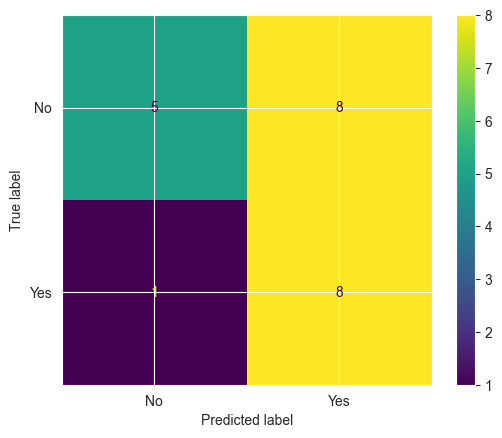

In [39]:
ConfusionMatrixDisplay.from_estimator(lr_pipe, X_test, y_test)
plt.savefig("./images/log_conf.png")

#### K Nearest Neighbors

In [40]:
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier())
])

In [41]:
param_grid = {
    'model__n_neighbors': np.arange(3, 31, 2),
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['minkowski', 'manhattan']
}

In [42]:
grid = GridSearchCV(pipe, param_grid, cv=5)

In [43]:
grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__metric': ['minkowski', 'manhattan'], 'model__n_neighbors': array([ 3, 5..., 25, 27, 29]), 'model__weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for eac

In [44]:
grid.best_score_

np.float64(0.7252747252747254)

In [45]:
grid.best_params_

{'model__metric': 'minkowski',
 'model__n_neighbors': np.int64(7),
 'model__weights': 'uniform'}

In [46]:
grid.score(X_test, y_test)

0.45454545454545453

In [47]:
grid.score(X_train, y_train)

0.7727272727272727

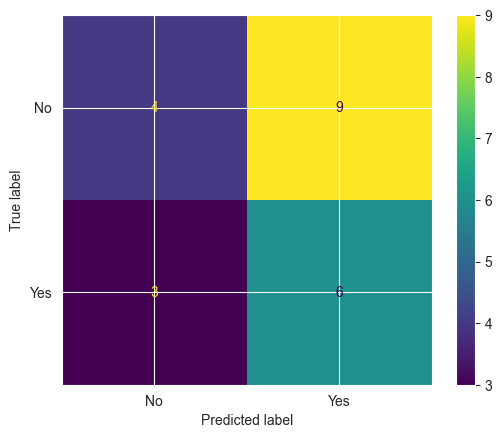

In [48]:
ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_test)

#### Random Forest

In [49]:
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

In [50]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, 20, None],
    'model__min_samples_split': [2,3,4]
}

In [51]:
grid = GridSearchCV(pipe, param_grid, cv=5)

In [52]:
grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__max_depth': [5, 10, ...], 'model__min_samples_split': [2, 3, ...], 'model__n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate 

In [53]:
grid.score(X_test, y_test)

0.5454545454545454

In [54]:
grid.score(X_train, y_train)

1.0

In [55]:
grid.best_score_

np.float64(0.6967032967032967)

In [56]:
grid.best_params_

{'model__max_depth': 10,
 'model__min_samples_split': 2,
 'model__n_estimators': 100}

In [57]:
y_preds = grid.best_estimator_.predict(X_test)

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          No       0.71      0.38      0.50        13
         Yes       0.47      0.78      0.58         9

    accuracy                           0.55        22
   macro avg       0.59      0.58      0.54        22
weighted avg       0.61      0.55      0.53        22



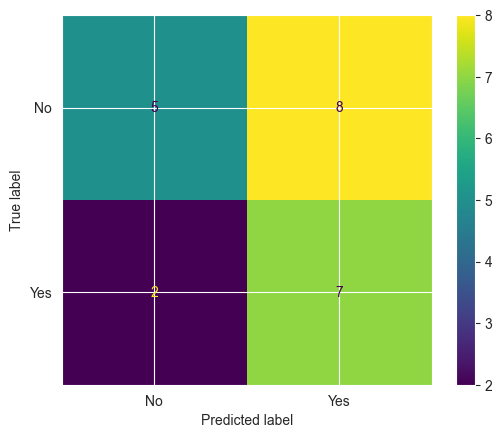

In [59]:
ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_test)

## Pickling

In [60]:
import pickle

Logistic Regression performed the best, so it will be used in the flask app. 

In [61]:
# with open('model.pkl', 'wb') as file:
#     pickle.dump(lr_pipe, file)

In [62]:
X.head()

,marital_status,diploma_type,gender,year_graduated,salary,fee,savings
0,Single,Standard Diploma,Male,2004,125000,10869,86000.0
1,Married,College Prep Diploma,Male,2005,100000,10869,116000.0
2,Single,Standard Diploma,Female,2006,70000,10869,52000.0
3,Married,Standard Diploma,Male,2007,120000,10869,76000.0
4,Divorced,Standard Diploma,Female,2006,95000,11948,52000.0


In [63]:
y.head()

0    Yes
1     No
2    Yes
3     No
4    Yes
Name: defaulted, dtype: object

In [64]:
X.describe()

,year_graduated,salary,fee,savings
count,88.000000,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273,47954.545455
std,1.560852,21234.128008,1110.647949,28324.437721
min,2004.000000,35000.000000,10869.000000,6000.000000
25%,2005.000000,75000.000000,10968.000000,30000.000000
50%,2006.500000,75000.000000,11696.000000,46000.000000
75%,2008.000000,90000.000000,12058.250000,67000.000000
max,2009.000000,160000.000000,20960.000000,146000.000000
